# 1
<h3>Es posible transformar algorithm en analysis sin usar operaciones “izquierda”. Escriba una secuencia de operaciones (de la misma forma que la tabla de ejemplo) que tenga el mismo costo que el mostrado en el ejemplo pero sin usar operaciones “izquierda”.</h3>

# 2
<h3>Muestre que para dos cadenas $x$ y $y$ con distancia de edicion $d(x, y)$, existe una secuencia $S$ de operaciones que transforman $x$ en y con costo $d(x, y)$ donde $S$ no contiene operaciones “izquierda”.</h3>

La distancia entre las dos palabras puede ser calculada sin saltos a la izquierda (Asumiendo que la funcion de insertar se hace en la posicion anterior a la actual) 

1) Igualar $z = x$<br>
2) Se empieza a recorrer $z$ comparando con $y$ su posicion actual, $z[i] == y[i]$<br>
3) Si el caracter actual de $z$, $z[i]$ se encuentra en $y$ en una posicion mayor, entonces se inserta en $z$ la posicion actual de $y$, $z[i] = y[i]$, se corre lo demás a la derecha y se mueve el cursor una vez a la derecha<br>
4) Si se encuentra en la misma posicion se mueve el cursor una vez a la derecha<br>
5) Si el caracter actual de $z$ no se encuentra en $y$ y la posicion actual es menor a $len(y)$ se debe realizar un reemplazo de la letra por la de la misma posicion en $y$, $z[i] = y[i]$ y se mueve el cursor una vez a la derecha<br>
6) Finalmente si la posicion actual es mayor a $len(y)$, se debe eliminar hasta terminar.

# 3
<h3>Muestre que el problema de calcular la distancia de edicion $d(x, y)$ presenta una subestructura óptima. (Considere todos los sufijos de $x$ y $y$)</h3>

En ambos codigos presentados, se encuentran subestructuras optimas, en la recursiva podemos encontrar un poco de bottom-up en el momento en que los llamados retornan sus casos base hasta su primer llamado y a su vez up-bottom cuando se retorna el mínimo una vez se tienen los 3 tipos de costo. En el metodo no recursivo, se usa solamente bottom-up, debido a que se va llenando una matriz hasta su ultima iteracion, teniendo en cuenta el registro de solo el anterior resultado y una vez se completa de llenar la matriz, se retorna su valor final.

# 4
<h3>Recursivamente defina el valor de la distancia de edición $d(x, y)$ en terminos de los sufijos de las cadenas $x$ y $y$. Señale como la distancia de edicion contiene sobrelapamiento de los subproblemas.</h3>

En la forma recursiva, se empieza analizando la palabra de atras para adelante, simulando las acciones de eliminacion, insercion o sustitucion con sus respectivos costos, una vez se llega al caso base, dicho resultado se retorna hasta su primer llamado, es alli donde se produce el sobrelapamiento de los problemas, ya que el valor de las tres situaciones es almacenado en 3 variables las cuales son comparadas extrayendo el minimo costo.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as pl
import time
import random as rnd
import string
%matplotlib inline

In [2]:
def distanceRecursive(s1, s2, n, m):
    if(n == 0 == m):
        return 0
    if(n == 0):
        return m
    if(m == 0):       
        return n
     
    replace = distanceRecursive(s1, s2, n-1, m-1) + ((s1[n-1] != s2[m-1])*4)
    delete = distanceRecursive(s1, s2, n-1, m)+2
    add = distanceRecursive(s1, s2, n, m-1)+3

    return  min(replace, delete, add)


pal1 = "algorithm"
pal2 = "analysis"
print distanceRecursive(pal1, pal2, len(pal1), len(pal2))

20


# 5
<h3>Describa un algoritmo de programación dinámica que calcule la distancia de edición de $x$ y $y$. (Usando memorización) Analice el tiempo de ejecución y el espacio requeridos por su algoritmo.</h3>

El siguiente algoritmo se basa en evaluar las dos palabras iniciando desde su ultimo caracter y una vez se llega al caso base se retorna el respectivo valor asociado a su costo, el tiempo de ejecucion de este algoritmo al igual que su espacio requerido es de $O(nxm)$ ya que siempre se crea una matriz para guardar un registro de los datos siendo $n$ y $m$ la longitud de ambas palabras.

In [3]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [4]:
def distancePDExp(s1, s2, acct):
    mat = np.zeros((len(s1)+1, len(s2)+1), dtype=np.int); acct.count()
    for i in range(len(s1)+1):
        acct.count()
        mat[i,0]=i; acct.count()
    for i in range(len(s2)+1):
        acct.count()
        mat[0,i] = i; acct.count()
        
    for i in range(1, len(s1)+1):
        acct.count()
        for j in range(1, len(s2)+1):
            acct.count()
            cost = min(mat[i,j-1]+3, mat[i-1,j]+2, mat[i-1,j-1]+(s1[i-1] != s2[j-1])*4); acct.count()
            mat[i,j] = cost; acct.count()
            
    return mat

In [5]:
def exper_distancePDExp(n):
    steps = []
    timeP = []
    acct = Counter()
    for i in range(1, n):
        l1 = "".join(rnd.choice(string.ascii_uppercase) for _ in range(i))
        l2 = "".join(rnd.choice(string.ascii_uppercase) for _ in range(i))
        acct.reset()
        tic = time.clock()
        distancePDExp(l1, l2, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        
    results = [steps, timeP]
    return results

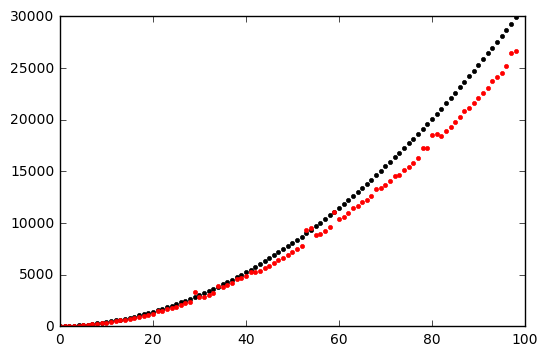

In [6]:
pl.figure(1)
x = np.arange(99)
res = exper_distancePDExp(100)
p = np.array(res[0])           #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1])*1e6          #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)

pl.plot(x, p, 'k.', t, 'r.')

# 6
<h3>Implemente su algoritmo en Python, y publiquelo en un NoteBook donde lo pruebe para las cadenas:
$x = software$ $engineering$, $y = computer$ $science$</h3>

In [7]:
import numpy as np

def distancePD(s1, s2, n, m):
    mat = np.zeros((n+1, m+1), dtype=np.int)
    for i in range(n+1):
        mat[i,0]=i
    for i in range(m+1):
        mat[0,i] = i
        
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = min(mat[i,j-1]+3, mat[i-1,j]+2, mat[i-1,j-1]+(s1[i-1] != s2[j-1])*4)
            mat[i,j] = cost
            
    return mat[n,m]

pal1 = "software engineering"
pal2 = "computer science"
print distancePD(pal1, pal2, len(pal1), len(pal2))

44


# 7
<h3>Ejecute su programa para las tres instancias proveidas en 3 archivos de texto plano, donde cada archivo contiene las siguientes cuatro líneas:<br>
(a) El número de caracteres m en la cadena x.<br>
(b) La cadena x<br>
(c) El número de caracteres n en la cadena y.<br>
(d) La cadena y</h3>

In [14]:
infile = open('ps7_input1.txt')
par = []
for line in infile:
    par.append(line)
infile.close()

print "Distancia: ", distancePD(par[1], par[3], int(par[0]), int(par[2]))

Distancia:  1601


In [15]:
infile = open('ps7_input2.txt')
par = []
for line in infile:
    par.append(line)
infile.close()

print "Distancia: ", distancePD(par[1], par[3], int(par[0]), int(par[2]))

Distancia:  1687


In [16]:
infile = open('ps7_input3.txt')
par = []
for line in infile:
    par.append(line)
infile.close()

print "Distancia: ", distancePD(par[1], par[3], int(par[0]), int(par[2]))

Distancia:  1431
